# Seaborn이란?

* 데이터 분석 관점에서 품질 높은 데이터 시각화를 위한 고급 그래프를 쉽게 그릴 수 있는 기능을 제공하는 라이브러리

In [8]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
fmri=sns.load_dataset('fmri')


# 환자별 (subject) timepoint마다의 fmri signal 값을 담고 있는 데이터

In [19]:
fmri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   subject    1064 non-null   object 
 1   timepoint  1064 non-null   int64  
 2   event      1064 non-null   object 
 3   region     1064 non-null   object 
 4   signal     1064 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 41.7+ KB


C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='timepoint', ylabel='signal'>

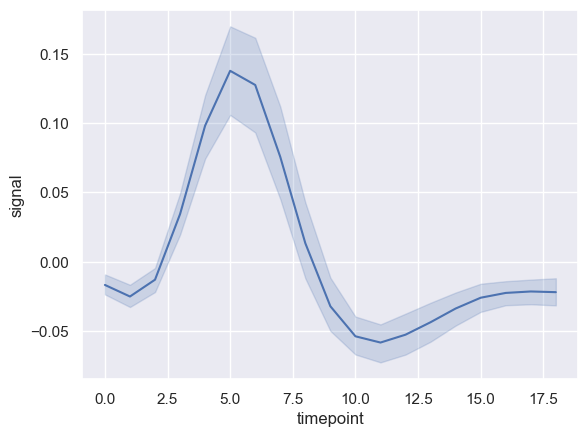

In [21]:
sns.set(style='darkgrid')
sns.lineplot(x='timepoint', y='signal', data=fmri) # x: x축에 해당하는 데이터프레임 열 이름, y: y축에 해당하는 데이터프레임 열 이름

### 차트에 대한 해석예

* 중앙에 있는 선은 각 timepoint 별 signal의 평균값을 표현하고 있고, 넓은 영역은 각 timepoint별 signal의 분포(범위)를 표현 
* 대략 3.5초까지는 환자별로 거의 동일한 fmri signal을 보여주지만, 이후부터 7.5초까지는 꽤 큰 분포가 있는 것을 확인
* timepoint의 범위는 대략 0에서 17.5 구간에서 관측이 되었음
* signal은 대략 0미만에서 시작하여 timepoint 5구간까지 급격히 상승후 timepoint 10 구간까지 -0.05까지 급격히 하락함
* 이후 17.5까지 완만히 상승함

### 차트 해석 Tip

* 시각화에 표시된 데이터요소를 그대로 묘사해 본다.
* 변곡점, 최대값, 최소값, 경향 등을 파악해 본다.
* 특별한 특이사항이 있는지 확인해본다.

#### 회의를 통해 합의된 차트분석내용을 통해 아래 항목이 도출되어야 한다.
* 습득한 지식
* 인사이트

In [11]:
fmri['event'].value_counts()

event
stim    532
cue     532
Name: count, dtype: int64

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='timepoint', ylabel='signal'>

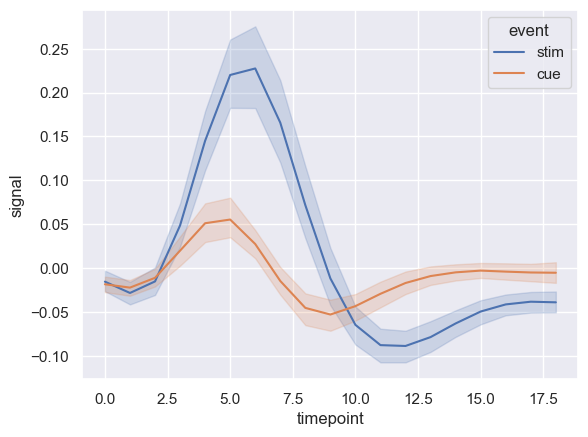

In [12]:
sns.lineplot(x='timepoint', y='signal', hue='event', data=fmri) 
# hue를 통해 범주형 데이터 열이름을 입력하면 분류별 차트를 자동으로 생성할 수 있다.

* Stim 및 cue 그룹별 시그널 패턴은 기본적으로 유사하나 변동폭은 stim 그룹이 더 크다.
* 하락 후 상승패턴은 cue 그룹에서 먼저 발견되었다.
* timepoint 5 지점에서 Stim과 Cue 그룹간 가장 큰 이격이 발생했다.
* timepoint 10 부근에서 시그널 교차가 발생했다.
* 급격한 상승 패턴 이후 완만한 상승 패턴 경향을 보이고 있다.
* 수집된 timepoint 마지막 구간에서 특정 시그널 값에 수렴하는 경향도 보이기 때문에 추가적인 데이터 수집 및 분석이 필요해 보인다.

## Seaborn 장점
- 통계관점의 보조지표를 자동으로 제공한다.
- 그룹별 차트 생성이 용이하다